# Classwork Classification and Regression


## Lib

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
# Classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

#Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [69]:
# 1.1 read data 
filename = 'data/adult.csv'

columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 
           'marital-status', 'occupation', 'relationship', 'race', 'sex', 
           'capital-gain', 'capital-loss',     'hours-per-week', 'native-country', 'income']

df = pd.read_csv(filename, names= columns)
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [70]:
print(df.shape)

(32561, 15)


In [71]:
names = list(df.columns)
print(names)

['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']


In [72]:
df.__dict__

{'_is_copy': None,
 '_mgr': BlockManager
 Items: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
        'marital-status', 'occupation', 'relationship', 'race', 'sex',
        'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
        'income'],
       dtype='object')
 Axis 1: RangeIndex(start=0, stop=32561, step=1)
 NumpyBlock: [ 0  2  4 10 11 12], 6 x 32561, dtype: int64
 NumpyBlock: [ 1  3  5  6  7  8  9 13 14], 9 x 32561, dtype: object,
 '_item_cache': {},
 '_attrs': {},
 '_flags': <Flags(allows_duplicate_labels=True)>}

income
<=50K    24720
>50K      7841
Name: count, dtype: int64


<Axes: xlabel='income'>

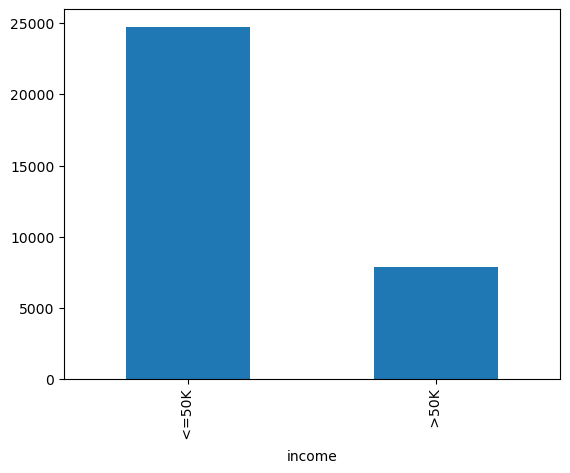

In [73]:
g = df[names[-1]].value_counts()
print(g)
g.plot.bar()

In [74]:
types = df.dtypes
print(types)

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object


## Preprocessing  
-  Label encoder
-  Normalization

In [75]:
from sklearn.preprocessing import LabelEncoder 

le = LabelEncoder()
for i in range(len(types)):
    if types[i]=='object':
        le.fit_transform(df[names[i]])
        df[names[i]] = le.transform(df[names[i]])
data = df.values
print(data[:2])

[[   39     7 77516     9    13     4     1     1     4     1  2174     0
     40    39     0]
 [   50     6 83311     9    13     2     4     0     4     1     0     0
     13    39     0]]


C:\Users\Snape\AppData\Local\Temp\ipykernel_20900\2980909581.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if types[i]=='object':
C:\Users\Snape\AppData\Local\Temp\ipykernel_20900\2980909581.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if types[i]=='object':
C:\Users\Snape\AppData\Local\Temp\ipykernel_20900\2980909581.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if types[i]=='object':
C:\Users\Snape\AppData\Local

In [76]:
data = df.values
print(data[:2])

[[   39     7 77516     9    13     4     1     1     4     1  2174     0
     40    39     0]
 [   50     6 83311     9    13     2     4     0     4     1     0     0
     13    39     0]]


In [77]:
X = data[:,:-1]
y = data[:,-1]
print(X.shape)
print(y.shape)

(32561, 14)
(32561,)


In [78]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
print(X_scaled[0])

[0.30136986 0.875      0.0443019  0.6        0.8        0.66666667
 0.07142857 0.2        1.         1.         0.02174022 0.
 0.39795918 0.95121951]


In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split \
(X_scaled,y,random_state=42)


In [80]:
print(len(y_test))

8141


## Classification
- KNN
- Decision tree
- Naive Bayes

### KNN

In [81]:
#kNN = KNeighborsClassifier(n_neighbors=3, weights = 'distance')
kNN = KNeighborsClassifier(n_neighbors=3)
kNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [82]:
y_pred_KNN = kNN.predict(X_test)# dự đoán
print(confusion_matrix(y_test,y_pred_KNN))
print(classification_report(y_test,y_pred_KNN))

[[5546  668]
 [ 812 1115]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      6214
           1       0.63      0.58      0.60      1927

    accuracy                           0.82      8141
   macro avg       0.75      0.74      0.74      8141
weighted avg       0.81      0.82      0.82      8141



### Decision tree

In [83]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
y_pred_DTree = dtree.predict(X_test)


In [84]:
print(confusion_matrix(y_test,y_pred_DTree))
print(classification_report(y_test,y_pred_DTree))

[[5414  800]
 [ 717 1210]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      6214
           1       0.60      0.63      0.61      1927

    accuracy                           0.81      8141
   macro avg       0.74      0.75      0.75      8141
weighted avg       0.82      0.81      0.81      8141



### Naive Bayes

In [85]:
naive = MultinomialNB()

naive.fit(X_train, y_train)
y_pred_NB = dtree.predict(X_test)


In [86]:
print(confusion_matrix(y_test,y_pred_NB))
print(classification_report(y_test,y_pred_NB))

[[5414  800]
 [ 717 1210]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      6214
           1       0.60      0.63      0.61      1927

    accuracy                           0.81      8141
   macro avg       0.74      0.75      0.75      8141
weighted avg       0.82      0.81      0.81      8141



## Regression
- Evaluate by MSE and R2

### Linear regression

In [87]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

y_pred = linear_regression.predict(X_test)

In [88]:
# Calculate MSE and R-squared
mse_LR = mean_squared_error(y_test, y_pred)
r2_LR = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print("Mean Squared Error (MSE_LR):", mse_LR)
print("R-squared (R2):", r2_LR)


Model Evaluation:
Mean Squared Error (MSE_LR): 0.13290560933132559
R-squared (R2): 0.26439299408491845


### Decision Tree Regression

In [89]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [90]:
mse_DT = mean_squared_error(y_test, y_pred)
r2_DT = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print("Mean Squared Error (MSE):", mse_DT)
print("R-squared (R2):", r2_DT)


Model Evaluation:
Mean Squared Error (MSE): 0.18953445522663062
R-squared (R2): -0.049036785042195774


### KNN regression

In [91]:
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [92]:
mse_KNN = mean_squared_error(y_test, y_pred)
r2_KNN = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print("Mean Squared Error (MSE):", mse_KNN)
print("R-squared (R2):", r2_KNN)


Model Evaluation:
Mean Squared Error (MSE): 0.1373568630662354
R-squared (R2): 0.23975616010191836
